Este projeto consiste em uma análise multidimensional da performance das filiais da rede do Sr. João, com o objetivo de fundamentar uma decisão de desinvestimento (venda de unidade).

Através da integração de dados financeiros e qualitativos, o estudo avalia a saúde das operações não apenas pelo faturamento bruto, mas pela eficiência na conversão de esforço logístico em valor (%Ratio) e pela taxa de fidelização e satisfação do cliente (Análise de Detratores).

**Limitações:** dada a ausência de dados de custo operacional, esta análise utiliza métricas de eficiência de faturamento e sentimento do consumidor como os principais proxies (indicadores substitutos) para inferir a viabilidade econômica e a saúde futura das filiais.

#I. Analise exploratoria 🕵

###0. Importação dos dados 🖥



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

In [ ]:
#Lista de lojas
lojas = [loja1, loja2, loja3, loja4]

#Dataset geral com todas as lojas
fullset_lojas = pd.concat(lojas,keys=[1,2,3,4],names=["Loja"])
fullset_lojas.reset_index(inplace=True)
fullset_lojas.drop('level_1',axis=1,inplace=True)

fullset_lojas.head()

,Loja,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,1,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,1,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,1,Micro-ondas,eletrodomesticos,"1,009.99",54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,1,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
fullset_lojas.isnull().sum()

,0
Loja,0
Produto,0
Categoria do Produto,0
Preço,0
Frete,0
Vendedor,0
Local da compra,0
Avaliação da compra,0
Tipo de pagamento,0
Quantidade de parcelas,0


In [ ]:
#Converte a data para formato datetime, cria columas de ano e mes
fullset_lojas['Data compra'] = pd.to_datetime(fullset_lojas['Data da Compra'],dayfirst=True)
fullset_lojas['Ano'] = fullset_lojas['Data compra'].dt.year
fullset_lojas['Mes'] = fullset_lojas['Data compra'].dt.month
fullset_lojas.drop('Data da Compra',axis=1,inplace=True)
fullset_lojas.head()

,Loja,Produto,Categoria do Produto,Preço,Frete,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Data compra,Ano,Mes
0,1,Assistente virtual,eletronicos,219.08,9.25,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,2021-01-16,2021,1
1,1,Mesa de jantar,moveis,256.35,11.23,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,2022-05-18,2022,5
2,1,Jogo de tabuleiro,brinquedos,279.51,21.26,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,2021-03-15,2021,3
3,1,Micro-ondas,eletrodomesticos,"1,009.99",54.67,João Souza,RS,4,boleto,1,-30.17,-53.50,2022-05-03,2022,5
4,1,Cadeira de escritório,moveis,446.99,26.96,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,2020-11-07,2020,11


In [ ]:
fullset_lojas.describe()

,Loja,Preço,Frete,Avaliação da compra,Quantidade de parcelas,lat,lon,Data compra,Ano,Mes
count,"9,435.00","9,435.00","9,435.00","9,435.00","9,435.00","9,435.00","9,435.00",9435,"9,435.00","9,435.00"
mean,2.50,622.31,33.17,4.01,2.93,-20.53,-47.17,2021-08-16 07:36:48.076311808,"2,021.15",6.17
min,1.00,10.07,0.00,1.00,1.00,-30.17,-70.55,2020-01-01 00:00:00,"2,020.00",1.00
25%,1.50,73.61,4.01,3.00,1.00,-22.25,-48.79,2020-10-27 00:00:00,"2,020.00",3.00
50%,2.00,295.35,15.65,5.00,1.00,-22.19,-48.79,2021-08-22 00:00:00,"2,021.00",6.00
75%,3.00,884.40,46.59,5.00,4.00,-18.10,-44.38,2022-06-04 12:00:00,"2,022.00",9.00
max,4.00,"3,969.38",216.71,5.00,24.00,1.99,-36.59,2023-03-31 00:00:00,"2,023.00",12.00
std,1.12,787.09,41.97,1.39,2.80,5.40,4.18,NaN,0.94,3.56


In [ ]:
fullset_lojas_escopotemporal = fullset_lojas.groupby(['Ano','Loja']).agg(mes_count=('Mes','nunique')).reset_index()
fullset_lojas_escopotemporal

,Ano,Loja,mes_count
0,2020,1,12
1,2020,2,12
2,2020,3,12
3,2020,4,12
4,2021,1,12
5,2021,2,12
6,2021,3,12
7,2021,4,12
8,2022,1,12
9,2022,2,12


**A consolidação das bases resultou em um dataset com 100% de integridade, sem a presença de valores nulos, o que garante confiabilidade imediata para as análises subsequentes. O horizonte temporal abrange de janeiro de 2020 a março de 2023, totalizando três anos fiscais completos. Isso oferece robustez estatística suficiente para o mapeamento de sazonalidades anuais, permitindo utilizar o primeiro trimestre de 2023 como um validador de tendências recentes, em vez de um ciclo incompleto.**

**Adicionalmente, o alto desvio padrão observado nos preços não é um ruído, mas uma característica inerente ao modelo de negócio: confirma-se o perfil de "Loja de Departamentos" com um mix de produtos variado. Esse comportamento dita que análises de ticket médio devem ser feitas com cautela ou segmentadas, dado que a variância de valor entre os itens é significativa.**

##1. Análise do faturamento 📊



In [ ]:
#Faturamento agregado
faturamento = fullset_lojas.groupby('Loja').agg(faturamento=('Preço','sum')).reset_index()
faturamento['% do total']=((faturamento['faturamento']/faturamento['faturamento'].sum()))*100
faturamento['% vs Loja 1']=((faturamento['faturamento']/faturamento.loc[faturamento['Loja'] == 1, 'faturamento'].values[0])-1)*100
faturamento

,Loja,faturamento,% do total,% vs Loja 1
0,1,"1,534,509.12",26.13,0.00
1,2,"1,488,459.06",25.35,-3.00
2,3,"1,464,025.03",24.93,-4.59
3,4,"1,384,497.58",23.58,-9.78


In [ ]:
fullset_lojas['Preço'].sum()

np.float64(5871490.790000001)

In [ ]:
#Faturamento agregado por ano
faturamento_ano = fullset_lojas.pivot_table(index='Loja',columns='Ano',values='Preço',aggfunc='sum')
faturamento_ano['Faturamento Total'] = faturamento_ano.sum(axis=1)
faturamento_ano

Ano,2020,2021,2022,2023,Faturamento Total
Loja,,,,,
1,"491,911.51","482,829.91","422,086.24","137,681.46","1,534,509.12"
2,"427,288.25","468,288.89","477,635.56","115,246.36","1,488,459.06"
3,"428,943.09","483,938.91","467,250.70","83,892.33","1,464,025.03"
4,"441,129.52","463,763.27","402,961.23","76,643.56","1,384,497.58"


In [ ]:
#ticket medio agregado
ticketmedioagregado =  fullset_lojas.groupby('Loja').agg(faturamento=('Preço', 'sum'),q_vendas=('Produto','count')).reset_index()
ticketmedioagregado['Ticket Medio'] = ticketmedioagregado['faturamento']/ticketmedioagregado['q_vendas']
ticketmedioagregado

,Loja,faturamento,q_vendas,Ticket Medio
0,1,"1,534,509.12",2359,650.49
1,2,"1,488,459.06",2359,630.97
2,3,"1,464,025.03",2359,620.61
3,4,"1,384,497.58",2358,587.15


In [ ]:
#ticket medio agregado por ano
ticketmedioagregadoano =  fullset_lojas.groupby(['Loja','Ano']).agg(faturamento=('Preço', 'sum'),q_vendas=('Produto','count')).reset_index()
ticketmedioagregadoano['Ticket Medio'] = ticketmedioagregadoano['faturamento']/ticketmedioagregadoano['q_vendas']
ticketmedioagregado_ano_pivot = ticketmedioagregadoano.pivot_table(index='Loja',columns='Ano',values='Ticket Medio',aggfunc='sum')
ticketmedioagregado_ano_pivot

Ano,2020,2021,2022,2023
Loja,,,,
1,687.99,653.36,591.99,717.09
2,610.41,616.98,674.63,600.24
3,611.90,653.97,631.42,471.31
4,592.12,623.34,565.96,488.18


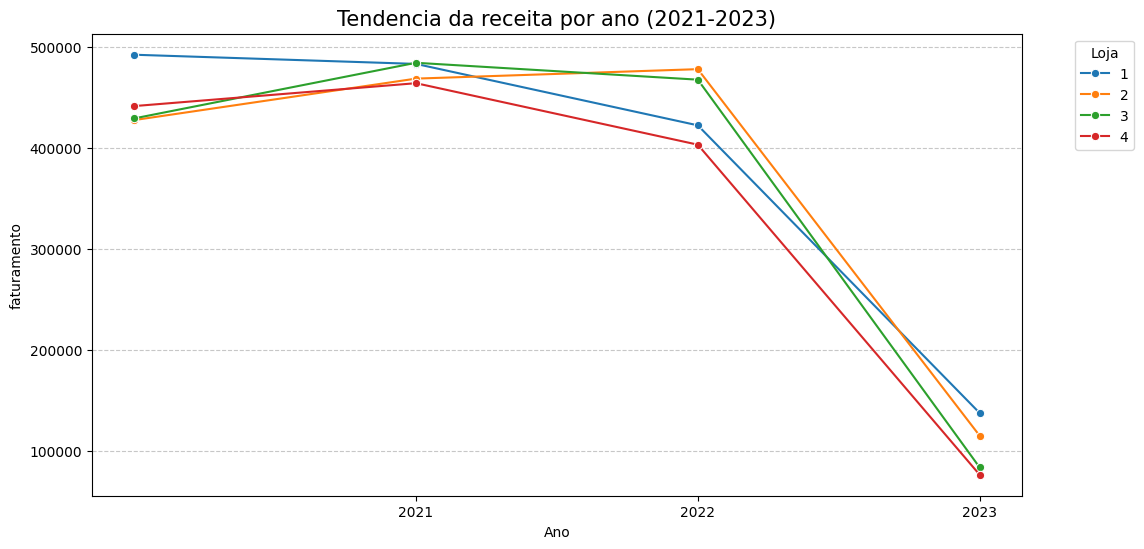

In [ ]:
# Grafico de tendendencia
tendencia = fullset_lojas.groupby(['Ano', 'Loja']).agg(faturamento=('Preço', 'sum')).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=tendencia, x='Ano', y='faturamento', hue='Loja', marker='o', palette='tab10')
plt.title('Tendencia da receita por ano (2021-2023)', fontsize=15)
plt.xticks([2021, 2022, 2023])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Loja', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

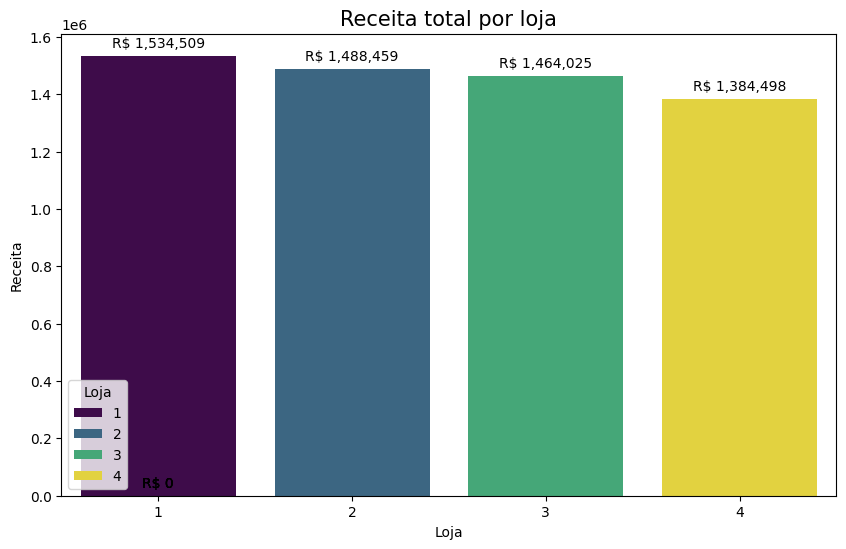

In [ ]:
#Grafico de faturamento
plt.figure(figsize=(10, 6))
faturamento_sorted = faturamento.sort_values('faturamento', ascending=False)
ax = sns.barplot(data=faturamento_sorted, x='Loja', y='faturamento',hue='Loja', palette='viridis')

for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Receita total por loja', fontsize=15)
plt.ylabel('Receita')
plt.show()

**A análise consolidada confirma a Loja 1 como líder de performance (26,13% do faturamento), enquanto a Loja 4 figura como o ponto de atenção da rede (23,58%). O cenário crítico da Loja 4 não se resume ao menor volume financeiro, mas à sua perda de eficiência: enquanto as demais unidades sustentaram seus patamares, a Loja 4 apresenta uma retração consistente no Ticket Médio, atingindo seu pior nível no Q1 de 2023.**

**Essa disparidade sugere que a operação da Loja 4 está perdendo tração comercial em um ritmo acelerado, tornando-se menos competitiva mesmo em períodos de recuperação da rede.**


## 2. Vendas por Categoria 💵


Nesta seção iremos observar a situação das vendas por categoria de produto, nas dimensões de valor e volume. As duas dimensões serão apresentadas em seus valores absolutos e relativos (quanto o acumulado de cada categoria representa do total). A partir do valores relativos, será calculado o Indíce de Eficiência da Receita (IER) por categoria, representado pela razão entre o %Valor pelo %Volume. Esse indíce nos diz a relação entre o faturamento gerado pelo produto em função da quantidade vendida.

In [ ]:
#Cria o dataset agregado por categoria do produto
vendas_categ = fullset_lojas.groupby(['Categoria do Produto','Loja']).agg(Q_total=('Categoria do Produto','count'), Valor=('Preço','sum')).reset_index().sort_values(by='Valor',ascending=False)
vendas_categ['%Q do total'] = vendas_categ['Q_total']/vendas_categ['Q_total'].sum()*100
vendas_categ['%V do total'] = vendas_categ['Valor']/vendas_categ['Valor'].sum()*100
vendas_categ['IER'] = vendas_categ['%V do total']/vendas_categ['%Q do total']
vendas_categ

,Categoria do Produto,Loja,Q_total,Valor,%Q do total,%V do total,IER
8,eletronicos,1,448,"572,659.23",4.75,9.75,2.05
9,eletronicos,2,422,"547,773.71",4.47,9.33,2.09
10,eletronicos,3,451,"547,699.92",4.78,9.33,1.95
11,eletronicos,4,451,"545,966.86",4.78,9.30,1.95
4,eletrodomesticos,1,312,"484,913.36",3.31,8.26,2.50
5,eletrodomesticos,2,305,"464,758.13",3.23,7.92,2.45
6,eletrodomesticos,3,278,"438,984.89",2.95,7.48,2.54
7,eletrodomesticos,4,254,"377,680.65",2.69,6.43,2.39
26,moveis,3,499,"268,095.56",5.29,4.57,0.86
27,moveis,4,480,"256,705.65",5.09,4.37,0.86


In [ ]:
#Gera dataset pivotado para facilitar a visão e comparação das vendas por valor, distribuidas por loja, nas categorias de produtos.
vendas_categ_pivot_valor = vendas_categ.pivot(index='Categoria do Produto',columns='Loja',values='Valor')
vendas_categ_pivot_valor['Total']=vendas_categ_pivot_valor.sum(axis=1)
vendas_categ_pivot_valor.sort_values(by='Total',inplace=True,ascending=False)
vendas_categ_pivot_valor

Loja,1,2,3,4,Total
Categoria do Produto,,,,,
eletronicos,"572,659.23","547,773.71","547,699.92","545,966.86","2,214,099.72"
eletrodomesticos,"484,913.36","464,758.13","438,984.89","377,680.65","1,766,337.03"
moveis,"250,178.11","235,234.68","268,095.56","256,705.65","1,010,214.00"
instrumentos musicais,"121,731.69","139,987.03","103,174.45","100,136.50","465,029.67"
esporte e lazer,"52,387.55","46,326.09","47,456.10","44,465.65","190,635.39"
brinquedos,"23,993.78","21,262.21","25,869.20","27,015.67","98,140.86"
utilidades domesticas,"16,931.48","19,662.86","20,080.21","20,098.83","76,773.38"
livros,"11,713.92","13,454.35","12,664.70","12,427.77","50,260.74"


In [ ]:
#Gera dataset pivotado para facilitar a visão e comparação das vendas por volume, distribuidas por loja, nas categorias de produtos.
vendas_categ_pivot_volume = vendas_categ.pivot(index='Categoria do Produto',columns='Loja',values='Q_total')
vendas_categ_pivot_volume['Total']=vendas_categ_pivot_volume.sum(axis=1)
vendas_categ_pivot_volume.sort_values(by='Total',inplace=True,ascending=False)
vendas_categ_pivot_volume

Loja,1,2,3,4,Total
Categoria do Produto,,,,,
moveis,465,442,499,480,1886
eletronicos,448,422,451,451,1772
brinquedos,324,313,315,338,1290
eletrodomesticos,312,305,278,254,1149
esporte e lazer,284,275,277,277,1113
instrumentos musicais,182,224,177,170,753
livros,173,197,185,187,742
utilidades domesticas,171,181,177,201,730


In [ ]:
#Apresenta a performance por categoria de produto
vendas_categ.groupby('Categoria do Produto').agg(V=('%V do total','sum'),Q=('%Q do total','sum'),Razao=('IER','mean')).sort_values(by='Razao',ascending=False)

,V,Q,Razao
Categoria do Produto,,,
eletrodomesticos,30.08,12.18,2.47
eletronicos,37.71,18.78,2.01
instrumentos musicais,7.92,7.98,0.99
moveis,17.21,19.99,0.86
esporte e lazer,3.25,11.80,0.28
utilidades domesticas,1.31,7.74,0.17
brinquedos,1.67,13.67,0.12
livros,0.86,7.86,0.11


In [ ]:
#Apresenta a performance por categoria de produto entre as lojas
vendas_categ.pivot(index='Categoria do Produto',columns='Loja',values='IER')

Loja,1,2,3,4
Categoria do Produto,,,,
brinquedos,0.12,0.11,0.13,0.13
eletrodomesticos,2.50,2.45,2.54,2.39
eletronicos,2.05,2.09,1.95,1.95
esporte e lazer,0.30,0.27,0.28,0.26
instrumentos musicais,1.07,1.00,0.94,0.95
livros,0.11,0.11,0.11,0.11
moveis,0.86,0.86,0.86,0.86
utilidades domesticas,0.16,0.17,0.18,0.16


In [ ]:
# Ticket Médio (Valor / Quantidade) por Loja e Categoria
vendas_categ['Ticket_Medio'] = vendas_categ['Valor'] / vendas_categ['Q_total']

# Pivot para comparar o Ticket Médio da Loja 4 vs Loja 1
pivot_ticket = vendas_categ.pivot(index='Categoria do Produto', columns='Loja', values='Ticket_Medio')
pivot_ticket['Diff_L4_vs_L1'] = (pivot_ticket[4] / pivot_ticket[1] - 1) * 100
pivot_ticket

Loja,1,2,3,4,Diff_L4_vs_L1
Categoria do Produto,,,,,
brinquedos,74.05,67.93,82.12,79.93,7.93
eletrodomesticos,"1,554.21","1,523.80","1,579.08","1,486.93",-4.33
eletronicos,"1,278.26","1,298.04","1,214.41","1,210.57",-5.30
esporte e lazer,184.46,168.46,171.32,160.53,-12.98
instrumentos musicais,668.86,624.94,582.91,589.04,-11.93
livros,67.71,68.30,68.46,66.46,-1.85
moveis,538.02,532.21,537.27,534.80,-0.60
utilidades domesticas,99.01,108.63,113.45,99.99,0.99


**Observamos que o tipo de produto com maior valor em vendas são os eletronicos, sendo responsavel por 37,7 % do total de vendas, seguido dos eletrodomesticos com 30% e dos moveis com 17%**

**No tocante ao volume de vendas, as categorias que mais vendem são moveis (19,99%), seguidos pelos eletronicos (18,78%) e brinquedos (13,67%).**

**Quando comparamos essas grandezas, podemos ver que os eletrodomesticos apresentam uma performance melhor que os eletronicos com uma margem considerável. Em contrapartida, todas as demais categorias tem uma perfomance muito inferior aos eletronicos e eletrodomesticos. O padrão se repete em todas as lojas.**

**Um ponto critico a se notar é que cerca de 41,07% do esforço logístico (volume vendido) gera apenas 7,09% da receita (categorias Esporte,Brinquedos, Utilidades e Livros). Esse fato não é isolado e esta presente em todas as lojas**

**Recomenda-se uma análise de custos sobre essas categorias para investigar se estão gerando lucro.**

**Por fim, quando observado o ticket médio, nota-se que nas categorias com melhor retorno estimado (Eletronicos e Eletrodomesticos) a loja 4 performa abaixo de todas as demais.**



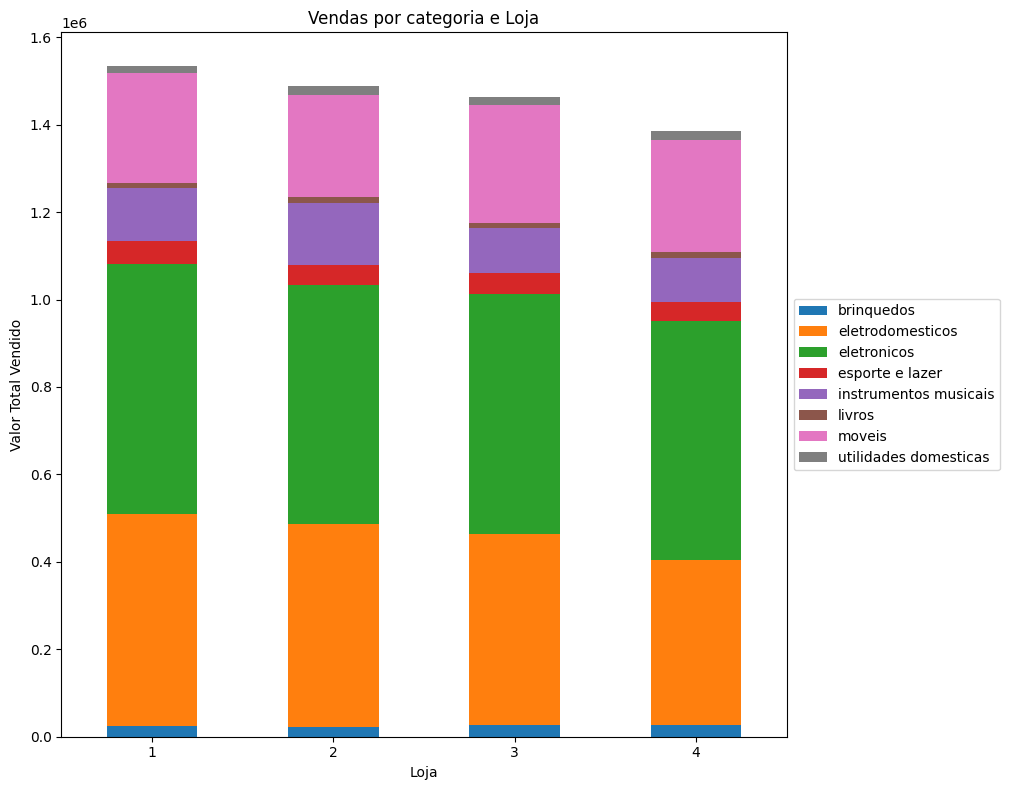

In [ ]:
#Gera novo dataset, pivotado. Plota colunas empilhadas para comparação
vendascateg_pivot = vendas_categ.pivot_table(index='Loja',columns='Categoria do Produto',values='Valor')

#Gera o grafico
ax_vendascateg = vendascateg_pivot.plot(kind='bar',stacked=True, figsize=(12,8), title='Vendas por categoria e Loja', xlabel='Loja', ylabel='Valor Total Vendido',rot=0)
ax_vendascateg.legend(loc="center left",bbox_to_anchor=(1.0,0.5))
plt.tight_layout(rect=[0,0,0.85,1])

## 3. Média de Avaliação das Lojas 📈

In [ ]:
#Media geral das Avaliações
print(f'{fullset_lojas['Avaliação da compra'].mean(): .0f}')

 4


In [ ]:
#Avaliacao media por loja
avaliacao_media = fullset_lojas.groupby('Loja').agg(Avaliacao_media=('Avaliação da compra','mean')).reset_index()
avaliacao_media


,Loja,Avaliacao_media
0,1,3.98
1,2,4.04
2,3,4.05
3,4,4.00


In [ ]:
avaliacao_media_ano = fullset_lojas.groupby(['Loja','Ano']).agg(Avaliacao_media=('Avaliação da compra','mean')).reset_index()
avaliacao_media_ano.pivot(index='Loja',columns='Ano',values='Avaliacao_media')

Ano,2020,2021,2022,2023
Loja,,,,
1,3.93,3.96,4.04,3.96
2,4.04,4.00,4.10,3.96
3,4.12,3.93,4.09,4.08
4,4.02,3.96,3.97,4.17


In [ ]:
#Avaliacao media por loja e categoria de produto
avaliacao_media_categ_prod = fullset_lojas.groupby(['Loja','Categoria do Produto']).agg(Avaliacao_media=('Avaliação da compra','mean')).reset_index()
pivot_valiacao_media_categ_prod = avaliacao_media_categ_prod.pivot(index='Categoria do Produto',columns='Loja',values='Avaliacao_media')
pivot_valiacao_media_categ_prod['Media_geral']=pivot_valiacao_media_categ_prod.mean(axis=1)
pivot_valiacao_media_categ_prod

Loja,1,2,3,4,Media_geral
Categoria do Produto,,,,,
brinquedos,4.08,4.03,4.20,3.99,4.07
eletrodomesticos,4.03,4.07,4.01,3.93,4.01
eletronicos,4.00,3.97,3.99,4.01,3.99
esporte e lazer,3.90,4.07,3.94,4.05,3.99
instrumentos musicais,4.05,4.04,4.01,3.91,4.00
livros,3.98,3.95,4.05,4.04,4.00
moveis,3.95,4.09,4.10,4.00,4.03
utilidades domesticas,3.75,4.07,4.07,4.01,3.98


In [ ]:
#Demonstra a distribuição de notas por loja
dist_ratings = fullset_lojas.groupby(['Loja','Avaliação da compra']).agg(Avaliacoes=('Avaliação da compra','count')).reset_index()
dist_ratings.pivot(index='Loja',columns='Avaliação da compra',values='Avaliacoes')

Avaliação da compra,1,2,3,4,5
Loja,,,,,
1,319,86,218,444,1292
2,273,93,209,482,1302
3,297,79,193,434,1356
4,310,85,210,453,1300


In [ ]:
#Cria uma marcação para o que é nota baixa (1 e 2)
fullset_lojas['Nota_Baixa'] = fullset_lojas['Avaliação da compra'].isin([1, 2])

# Calcula a porcentagem de notas baixas por loja
analise_detratores = fullset_lojas.groupby('Loja').agg(
    total_avaliacoes=('Avaliação da compra', 'count'),
    qtd_notas_baixas=('Nota_Baixa', 'sum')
).reset_index()

analise_detratores['% de Detratores'] = (analise_detratores['qtd_notas_baixas'] / analise_detratores['total_avaliacoes']) * 100

# Ordena para evidenciar quem tem mais clientes insatisfeitos
analise_detratores = analise_detratores.sort_values(by='% de Detratores', ascending=False)

analise_detratores

,Loja,total_avaliacoes,qtd_notas_baixas,% de Detratores
0,1,2359,405,17.17
3,4,2358,395,16.75
2,3,2359,376,15.94
1,2,2359,366,15.52


**Embora as médias de avaliação apresentem uma estabilidade aparente, a análise de detratores (notas 1 e 2) revela um cenário alarmante. A Loja 4 apresenta a segunda maior taxa de insatisfação da rede (16,75%), o que, somado ao seu baixo desempenho financeiro, cria um cenário de baixa atratividade operacional.**

**Enquanto o volume de detratores da Loja 1 (líder em vendas) exige uma revisão urgente de processos de escala, a situação da Loja 4 é mais crítica por ser cumulativa: ela falha em gerar receita e falha em satisfazer o cliente. Em um cenário de otimização de ativos, a Loja 4 se consolida como o principal gargalo da rede, onde o investimento necessário para recuperar a imagem e o faturamento dificilmente trará o retorno esperado. Portanto, o aspecto qualitativo ratifica a recomendação de venda imediata da filial.**

[Text(-50, 0, '3.977'),
 Text(-50, 0, '4.037'),
 Text(-50, 0, '4.048'),
 Text(-50, 0, '3.996')]

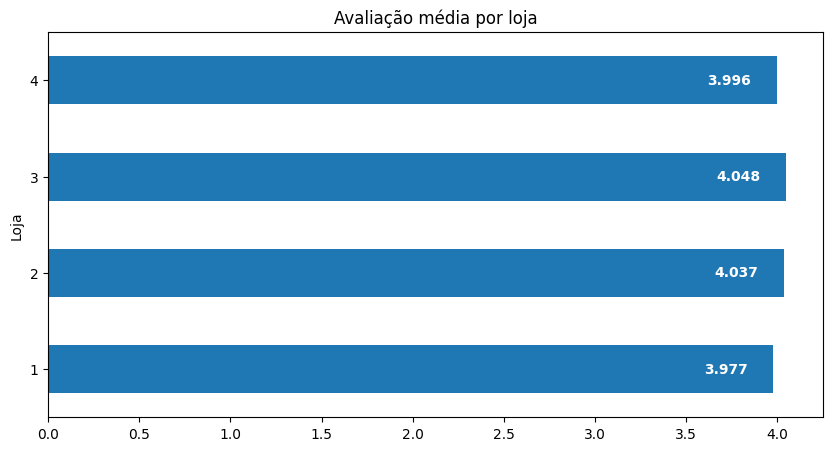

In [ ]:
#Plota avaliação media por loja
ax_avaliacao = avaliacao_media.plot(kind='barh',x='Loja',y='Avaliacao_media',legend=False, figsize=(10,5),title='Avaliação média por loja')
ax_avaliacao.bar_label(ax_avaliacao.containers[0],fmt='{:,.3f}',weight='bold',color='white',padding=-50,fontsize=10)

## 4. Produtos Mais e Menos Vendidos 📦

In [ ]:
vendas_por_produto = fullset_lojas.groupby(['Loja','Produto','Categoria do Produto']).agg(Q_total=('Produto','count'),Valor_total = ('Preço','sum')).sort_values(by='Q_total',ascending=False)
vendas_por_produto

Q_total  Valor_total
Loja Produto                  Categoria do Produto                       
2    Iniciando em programação livros                      65     4,169.96
     Micro-ondas              eletrodomesticos            62    48,256.37
4    Cama box                 moveis                      62    43,928.57
2    Bateria                  instrumentos musicais       61    61,566.87
1    Guarda roupas            moveis                      60    39,282.78
...                                                      ...          ...
2    Impressora               eletronicos                 34    13,846.69
1    Headset                  eletronicos                 33     6,307.71
     Celular ABXY             eletronicos                 33    43,534.47
4    Guitarra                 instrumentos musicais       33    34,430.67
2    Jogo de tabuleiro        brinquedos                  32     7,749.58

[204 rows x 2 columns]

In [ ]:
for i in range (1,5):
  print(f'-- Top 5 produtos por quantidade vendida na loja {i} --')
  print(vendas_por_produto.loc[i].head(5))
  print('\n')

-- Top 5 produtos por quantidade vendida na loja 1 --
                                         Q_total  Valor_total
Produto            Categoria do Produto                      
Guarda roupas      moveis                     60    39,282.78
Micro-ondas        eletrodomesticos           60    46,348.89
TV Led UHD 4K      eletronicos                60   189,534.28
Secadora de roupas eletrodomesticos           58    78,749.73
Blocos de montar   brinquedos                 56     2,487.74


-- Top 5 produtos por quantidade vendida na loja 2 --
                                                Q_total  Valor_total
Produto                  Categoria do Produto                       
Iniciando em programação livros                      65     4,169.96
Micro-ondas              eletrodomesticos            62    48,256.37
Bateria                  instrumentos musicais       61    61,566.87
Pandeiro                 instrumentos musicais       58     4,967.00
Violão                   instrumentos musi

In [ ]:
for i in range (1,5):
  print(f'-- Bottom 5 produtos por quantidade vendida na loja {i} --')
  print(vendas_por_produto.loc[i].tail(5))
  print('\n')

-- Bottom 5 produtos por quantidade vendida na loja 1 --
                                         Q_total  Valor_total
Produto           Categoria do Produto                       
Mochila           esporte e lazer             39     5,156.50
Pandeiro          instrumentos musicais       36     2,985.19
Panela de pressão utilidades domesticas       35     3,505.71
Headset           eletronicos                 33     6,307.71
Celular ABXY      eletronicos                 33    43,534.47


-- Bottom 5 produtos por quantidade vendida na loja 2 --
                                        Q_total  Valor_total
Produto           Categoria do Produto                      
Fone de ouvido    eletronicos                37     4,759.28
Poltrona          moveis                     35    11,218.00
Mesa de jantar    moveis                     34    11,516.31
Impressora        eletronicos                34    13,846.69
Jogo de tabuleiro brinquedos                 32     7,749.58


-- Bottom 5 produtos 

In [ ]:
vendas_por_produto_ratio =vendas_por_produto.copy().reset_index()
vendas_por_produto_ratio['%Q do total']=vendas_por_produto_ratio['Q_total']/vendas_por_produto_ratio['Q_total'].sum()
vendas_por_produto_ratio['%V do total']=vendas_por_produto_ratio['Valor_total']/vendas_por_produto_ratio['Valor_total'].sum()
vendas_por_produto_ratio['% ratio Q/V']=vendas_por_produto_ratio['%V do total']/vendas_por_produto_ratio['%Q do total']
pivot_vendas_por_produto_ratio = vendas_por_produto_ratio.pivot(index='Produto',columns='Loja',values='% ratio Q/V')
pivot_vendas_por_produto_ratio['T.Rt']=pivot_vendas_por_produto_ratio.mean(axis=1)
pivot_vendas_por_produto_ratio

Loja,1,2,3,4,T.Rt
Produto,,,,,
Assistente virtual,0.43,0.45,0.44,0.45,0.44
Bateria,1.52,1.62,1.53,1.54,1.56
Bicicleta,1.09,1.09,1.02,1.02,1.05
Blocos de montar,0.07,0.07,0.08,0.08,0.07
Bola de basquete,0.11,0.11,0.11,0.10,0.11
Bola de vôlei,0.11,0.11,0.10,0.11,0.11
Boneca bebê,0.10,0.11,0.11,0.10,0.11
Cadeira de escritório,0.82,0.81,0.86,0.78,0.82
Cama box,1.08,1.11,1.15,1.14,1.12


In [ ]:
#Cria dataset com as vendas em todas as lojas. Pivota para obter o total dos produtos vendidos, somando todas as lojas.
vendasprod_pivot = vendas_por_produto.pivot_table(index=['Produto','Categoria do Produto'],columns='Loja',values='Q_total')
vendasprod_pivot['Total'] = vendasprod_pivot[[1,2,3,4]].sum(axis=1)
vendasprod_pivot = vendasprod_pivot.sort_values(by='Total', ascending=False)
vendasprod_pivot

,Loja,1,2,3,4,Total
Produto,Categoria do Produto,,,,,
Cômoda,moveis,56.00,44.00,55.00,55.00,210.00
Carrinho controle remoto,brinquedos,52.00,47.00,52.00,55.00,206.00
Micro-ondas,eletrodomesticos,60.00,62.00,36.00,48.00,206.00
Bateria,instrumentos musicais,53.00,61.00,41.00,48.00,203.00
Cama king,moveis,44.00,45.00,56.00,56.00,201.00
Jogo de panelas,utilidades domesticas,43.00,52.00,55.00,50.00,200.00
Modelagem preditiva,livros,51.00,46.00,53.00,50.00,200.00
Secadora de roupas,eletrodomesticos,58.00,57.00,45.00,40.00,200.00
Blocos de montar,brinquedos,56.00,54.00,35.00,54.00,199.00


**A análise do mix de produtos confirma a fragilidade da Loja 4. Enquanto a rede traciona seu faturamento através de itens de alto ticket (Geladeiras e Lavadoras), a Loja 4 apresenta um descompasso estratégico: seus itens mais vendidos são de baixo valor agregado (Livros e Utilidades), enquanto os 'motores de receita' da companhia figuram entre os seus menos vendidos.**

**Além do baixo faturamento, essa configuração implica em ineficiência operacional: a filial concentra seu esforço logístico e espaço de armazenamento em categorias como Móveis, que possuem alto custo de ocupação e menor retorno relativo, sem converter as vendas premium que justificariam tal operação. Em suma, a Loja 4 opera com o custo de uma loja de departamentos, mas com o ticket médio de uma loja de conveniência.**

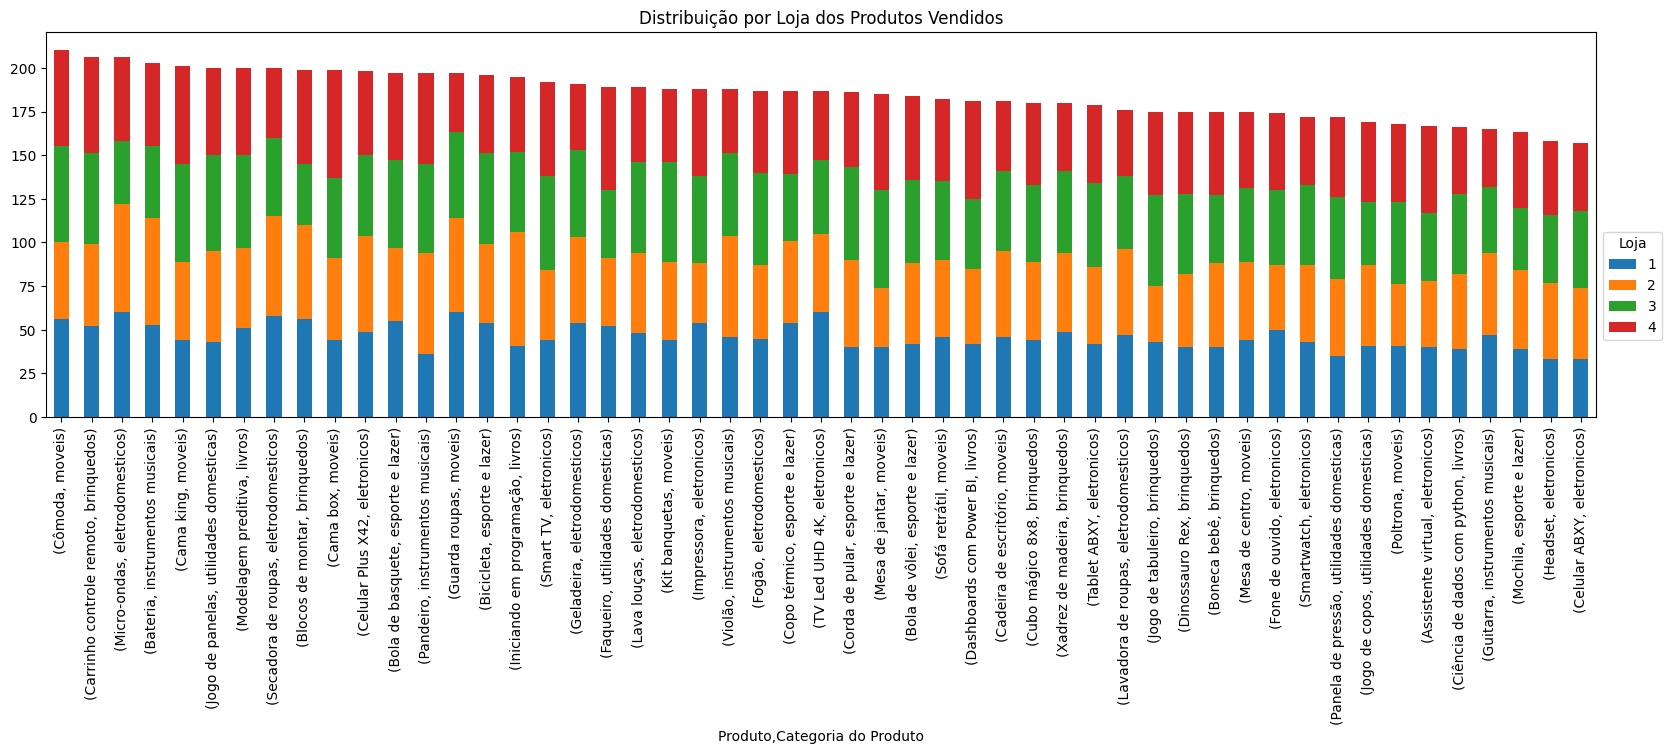

In [ ]:
ax_vendasprod = vendasprod_pivot[[1,2,3,4]].plot(kind='bar',stacked=True, figsize=(20,5), title="Distribuição por Loja dos Produtos Vendidos")
ax_vendasprod.legend(loc="upper left",bbox_to_anchor=(1.0,0.5),title='Loja')
plt.close(ax_vendasprod.figure)

display(ax_vendasprod.figure)

## 5. Frete Médio por Loja 🚅

In [ ]:
#Frete medio por loja

frete_medio = fullset_lojas.groupby('Loja').agg(Frete_Medio=('Frete','mean'))
frete_medio

,Frete_Medio
Loja,
1,34.69
2,33.62
3,33.07
4,31.28


In [ ]:
# 1. Calcular o peso do frete em cada venda
fullset_lojas['Frete_Ratio'] = (fullset_lojas['Frete'] / fullset_lojas['Preço']) * 100

# 2. Agrupar por Loja para ver a eficiência logística
eficiencia_logistica = fullset_lojas.groupby('Loja').agg(
    Frete_Medio_Absoluto=('Frete', 'mean'),
    Peso_Logistico_Medio=('Frete_Ratio', 'mean')
).reset_index()

eficiencia_logistica

,Loja,Frete_Medio_Absoluto,Peso_Logistico_Medio
0,1,34.69,5.52
1,2,33.62,5.61
2,3,33.07,5.37
3,4,31.28,5.54


**A análise de eficiência logística revela um paradoxo: embora a Loja 4 tenha o menor frete absoluto (R$ 31,28), ela detém um dos maiores Pesos Logísticos (5,54%). Dado que o frete é custeado pelo cliente, esse indicador atua como uma barreira de conversão invisível. Enquanto as outras lojas diluem o custo de transporte em produtos de alto valor, a Loja 4 sobrecarrega o consumidor com um custo de frete proporcionalmente alto para itens de baixo ticket. Isso reforça a tese de que a filial está mal posicionada: ela não atrai vendas de alto valor e torna as vendas de baixo valor menos competitivas para o bolso do cliente**

#II. Conclusão Final e Recomendações 📋

Após uma análise profunda das dimensões financeiras, operacionais e qualitativas da rede, a recomendação estratégica para o Sr. João é o **desinvestimento (venda) da Loja 4.**

##1. Justificação da Recomendação (O Caso da Loja 4)

A Loja 4 apresenta um quadro de ineficiência estrutural, suportado pelos seguintes pilares:

* **Baixa Conversão de Valor**: Embora o volume de vendas seja equiparável ao das outras unidades, a Loja 4 detém o menor Ticket Médio da rede. A filial falha em converter itens "motores de receita" (Eletrodomésticos e Eletrónicos), concentrando o seu esforço em categorias de baixo valor agregado.


*   **Desequilíbrio Logístico:** A unidade apresenta o menor frete absoluto, mas o maior Peso Logístico (5,54%). Como o frete é pago pelo cliente, este custo atua como uma barreira invisível que impede a venda de produtos mais caros, tornando a loja menos competitiva no seu mercado local.

*   **Fragilidade Qualitativa:** A Loja 4 possui a segunda maior taxa de detratores (16,75%). Ao contrário de lojas de alto volume, onde o erro é uma questão de escala, na Loja 4 a insatisfação é um sintoma de ineficiência operacional que não se justifica pelo retorno financeiro.


##2. Observação Crítica: Gestão de Risco na Loja 1


Embora a Loja 1 seja a líder em faturamento, a análise de satisfação revelou um sinal de alerta: **a maior taxa de insatisfação da rede (17,17%).**

**Recomendação:** Antes de reinvestir o capital da venda da Loja 4, recomenda-se uma auditoria de processos na Loja 1 para evitar que o faturamento seja comprometido pela perda de reputação a longo prazo.

##3. Veredito Técnico

A Loja 4 opera hoje com o **custo de uma loja de departamentos, mas com a rentabilidade de uma loja de conveniência**. A manutenção desta unidade representa um custo de oportunidade alto, visto que o esforço logístico e de pessoal não se traduz em margem ou saúde de marca.

**Ação Recomendada:** Proceder com a liquidação do estoque e venda da licença da filial 4, focando recursos na otimização logística das demais unidades.